In [2]:
from IPython.display import display, Latex
import sympy
from sympy.core.symbol import symbols, Symbol
from sympy.printing import latex, pprint
from sympy import log, exp, oo, integrate, Function, lambdify, nsolve, Pow, S, Derivative
from sympy import simplify, collect, expand, factor, apart, cancel 

from sympy.solvers.solveset import nonlinsolve, solveset
from sympy import solve
from sympy.solvers.ode import dsolve
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter
from scipy.optimize import curve_fit, root_scalar, root
from math import pow

In [3]:
#from IPython.display 
from sympy.core.symbol import symbols, Symbol
from sympy import inverse_laplace_transform
from sympy.printing import latex, pprint
from sympy import Matrix, zeros, eye,pi, I
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter
from scipy.optimize import curve_fit, root_scalar, root
from IPython.core.interactiveshell import InteractiveShell

In [4]:

InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last_expr"

In [5]:
R1 = symbols('R_1', real=True, positive=True)
R2 = symbols('R_2' ,real=True, positive=True)
C1 = symbols('C1' ,real=True, positive=True)
Vm = symbols('V_m' ,real=True)
V1 = symbols('V_1', real=True)
V2 = symbols('V_2', real=True)
V3 = symbols('V_3', real=True)
V4 = symbols('V_4', real=True)
E1 = symbols('E_1', real=True)
E2 = symbols('E_2', real=True)
I1 = symbols('I_1', real=True)
I2 = symbols('I_2', real=True)
I3 = symbols('I_3', real=True)
I4 = symbols('I_4', real=True)
s = symbols('s')
t = symbols('t', real=True, positive=True)
w = symbols('omega', real=True)
wp = symbols('omega_p', real=True)
f = symbols('f', real=True)
fp = symbols('f_p', real=True)
Avo = symbols('A_{vo}', real=True)
j=I
b = 4
n = 3
num = 2*b + n - 1

In [6]:
A = Matrix([[1,1,0,0],[0,-1,1,1],[-1,0,-1,-1]])
A
#Aa = A.rref()[0] #this messes up the Tableau matrix 
Aa = A.row([0,1]) #remove datum node KCL equation
Aa # size is n-1 x b 


Matrix([
[ 1,  1,  0,  0],
[ 0, -1,  1,  1],
[-1,  0, -1, -1]])

Matrix([
[1,  1, 0, 0],
[0, -1, 1, 1]])

In [7]:
M0 = Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,C1]])
M0
M1 =  Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,0]])
N0 = Matrix(np.zeros((4,4)))
N0
N1 =  Matrix([[0,0,0,0],[0,-R1,0,0],[0,0,-R2,0],[0,0,0,-1]])
U = Matrix([zeros(n-1+b,1),[Vm*s/(s**2 + w**2)],[0],[0],[0]])
U
Es = Matrix([[E1],[E2]])
Vs = Matrix([[V1],[V2],[V3],[V4]])
Is = Matrix([[I1],[I2],[I3],[I4]])

Matrix([
[0, 0, 0,  0],
[0, 0, 0,  0],
[0, 0, 0,  0],
[0, 0, 0, C1]])

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Matrix([
[                      0],
[                      0],
[                      0],
[                      0],
[                      0],
[                      0],
[V_m*s/(omega**2 + s**2)],
[                      0],
[                      0],
[                      0]])

In [8]:
((M0*s+M1)*Vs + (N0*s+N1)*Is).row(3)

Matrix([[C1*V_4*s - I_4]])

In [9]:
(M0*s+M1)*Vs + (N0*s+N1)*Is

Matrix([
[           V_1],
[-I_2*R_1 + V_2],
[-I_3*R_2 + V_3],
[C1*V_4*s - I_4]])

In [10]:
T = zeros(num, num)
T

Matrix([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

\begin{bmatrix}
n-1,n-1 & n-1,b & n-1,b\\ 
b,n-1 & b,b & b,b\\ 
b,n-1 & b,b & b,b
\end{bmatrix}

\begin{bmatrix}
2,2 & 2,4 & 2,4\\ 
4,2 & 4,4 & 4,4\\ 
4,2 & 4,4 & 4,4
\end{bmatrix}

In [49]:
T[0:n-1,n-1+b:] = Aa
T[n-1:b+n-1,:n-1] = -Aa.transpose()
T[n-1:b+n-1, n-1:b+n-1] = eye(4)
T[n-1+b:,n-1:n-1+b] = M0*s+M1
T[n-1+b:,n-1+b:] = N0*s+N1
T
Tinv = T**-1
Tinv 

Matrix([
[ 0,  0, 0, 0, 0,    0, 1,    1,    0,  0],
[ 0,  0, 0, 0, 0,    0, 0,   -1,    1,  1],
[-1,  0, 1, 0, 0,    0, 0,    0,    0,  0],
[-1,  1, 0, 1, 0,    0, 0,    0,    0,  0],
[ 0, -1, 0, 0, 1,    0, 0,    0,    0,  0],
[ 0, -1, 0, 0, 0,    1, 0,    0,    0,  0],
[ 0,  0, 1, 0, 0,    0, 0,    0,    0,  0],
[ 0,  0, 0, 1, 0,    0, 0, -R_1,    0,  0],
[ 0,  0, 0, 0, 1,    0, 0,    0, -R_2,  0],
[ 0,  0, 0, 0, 0, C1*s, 0,    0,    0, -1]])

Matrix([
[0,                                       0,                                               -1,                                               0,                                               0,                                                0,                                               1,                                          0,                                          0,                                       0],
[0,      R_1*R_2/(C1*R_1*R_2*s + R_1 + R_2),                  -R_2/(C1*R_1*R_2*s + R_1 + R_2),                  R_2/(C1*R_1*R_2*s + R_1 + R_2),                 -R_1/(C1*R_1*R_2*s + R_1 + R_2),         -C1*R_1*R_2*s/(C1*R_1*R_2*s + R_1 + R_2),                  R_2/(C1*R_1*R_2*s + R_1 + R_2),            -R_2/(C1*R_1*R_2*s + R_1 + R_2),             R_1/(C1*R_1*R_2*s + R_1 + R_2),      R_1*R_2/(C1*R_1*R_2*s + R_1 + R_2)],
[0,                                       0,                                                0,                                               0,    

In [39]:
W = Matrix([[Es], [Vs], [Is]])
W

Matrix([
[E_1],
[E_2],
[V_1],
[V_2],
[V_3],
[V_4],
[I_1],
[I_2],
[I_3],
[I_4]])

The linear system can be invertered and W solved for. 

In [40]:
#T*W - U # = 0 
Tinv*U
# norm_TinvU = Tinv*U /  tempting to normalize, but what if there were more sources? 

Matrix([
[                                                  V_m*s/(omega**2 + s**2)],
[                 R_2*V_m*s/((omega**2 + s**2)*(C1*R_1*R_2*s + R_1 + R_2))],
[                                                  V_m*s/(omega**2 + s**2)],
[V_m*s*(C1*R_1*R_2*s + R_1)/((omega**2 + s**2)*(C1*R_1*R_2*s + R_1 + R_2))],
[                 R_2*V_m*s/((omega**2 + s**2)*(C1*R_1*R_2*s + R_1 + R_2))],
[                 R_2*V_m*s/((omega**2 + s**2)*(C1*R_1*R_2*s + R_1 + R_2))],
[     V_m*s*(-C1*R_2*s - 1)/((omega**2 + s**2)*(C1*R_1*R_2*s + R_1 + R_2))],
[      V_m*s*(C1*R_2*s + 1)/((omega**2 + s**2)*(C1*R_1*R_2*s + R_1 + R_2))],
[                     V_m*s/((omega**2 + s**2)*(C1*R_1*R_2*s + R_1 + R_2))],
[           C1*R_2*V_m*s**2/((omega**2 + s**2)*(C1*R_1*R_2*s + R_1 + R_2))]])

In [21]:
(Tinv*U).row(4)[0]
vout = apart((Tinv*U).row(4)[0],s)
vout = inverse_laplace_transform(apart((Tinv*U).row(4)[0],s),s,t)
vout 
simplify(vout)

R_2*V_m*s/((omega**2 + s**2)*(C1*R_1*R_2*s + R_1 + R_2))

R_2*V_m*(-R_1 - R_2 + (C1*R_1*R_2*omega*sin(omega*t) + R_1*cos(omega*t) + R_2*cos(omega*t))*exp(t*(R_1 + R_2)/(C1*R_1*R_2)))*exp(-t*(R_1 + R_2)/(C1*R_1*R_2))/(C1**2*R_1**2*R_2**2*omega**2 + R_1**2 + 2*R_1*R_2 + R_2**2)

-R_2*V_m*(R_1 + R_2 - (C1*R_1*R_2*omega*sin(omega*t) + R_1*cos(omega*t) + R_2*cos(omega*t))*exp(t*(R_1 + R_2)/(C1*R_1*R_2)))*exp(-t*(R_1 + R_2)/(C1*R_1*R_2))/(C1**2*R_1**2*R_2**2*omega**2 + R_1**2 + 2*R_1*R_2 + R_2**2)

In [24]:
fs = 100e3
Ts = 1/fs 
subs = {R2: 10e3, R1:10e3, Vm:10, C1:.3e-9, w: 2*pi*fs}
fVout = lambdify(t, vout.subs(subs))

Text(0, 0.5, 'Voltage [V]')

Text(0.5, 0, 'Time [s]')

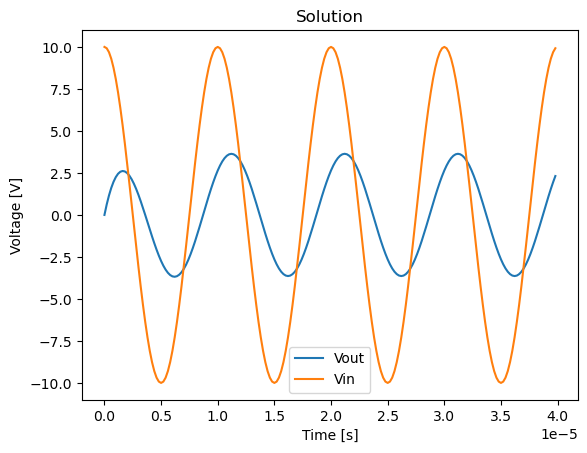

In [33]:
subs = {R2: 10e3, R1:10e3, Vm:10, C1:.3e-9, w:2*pi*100e3 }
fig, ax = plt.subplots(subplot_kw={'title':'Solution'})
#ax.set_ylim(bottom= -1, top=15)
#ax.set_xlim(left=0, right=t[-1]+epsilon)
ax.set_ylabel('Voltage [V]')
ax.set_xlabel('Time [s]')
samples = np.arange(0, 4*Ts, 4*Ts/200)
ax.plot(samples, fVout(samples), label='Vout')
ax.plot(samples, subs[Vm]*np.cos(2*fs*np.pi*samples), label='Vin')
ax.legend()

In [36]:
np.max(fVout(samples))/np.max(subs[Vm]*np.cos(2*fs*np.pi*samples))*2

0.7277259885010533

$TW = U$ has b branch circuit values undeclared. 
1. Choose some values and compute the simulation (the sweep of $s=j\omega$). 
In the time domain, one would need to integrate the set of differential equations at each step, and set the subsequent time step initial conditions to the prior step solution. In the Laplace domain, the set of equations is algebraic. 
What role does the frequency $\omega$ of the source play? When $s=j\omega$ and matches the source, the denominiator goes to 0. AC simulations show responses relative to the driving source. 
2. $2b+n-1=10$ equations - 3 circuit element values + 2 parameters that describe the input source ($V_m$ and $\omega$). 

This particular circuit will have the relation 
$ V_4 = V_{1}\frac{R_2||{Z_{C_1}}}{R_1+R_2||Z_{C_1}} = V_1\frac{R_2Z_{C_1}}{R_1(R_2+Z_{C_1})+R_2Z_{C_1}}$

$ V_4 = V_1\frac{R_2Z_{C_1}}{R_1R_2+R_1Z_{C_1}+R_2Z_{C_1}} =  V_1\frac{R_2Z_{C_1}}{R_1R_2+(R_1+R_2)Z_{C_1}}$

$ V_4 =  V_1\frac{R_2Z_{C_1}}{(R_1+R_2)(\frac{R_1R_2}{R_1+R_2}+Z_{C_1})}=  V_1\frac{R_2}{(R_1+R_2)(\frac{R_1R_2}{Z_{C_1}(R_1+R_2)}+1)}$

$ V_4 =  V_1\frac{R_2}{(R_1+R_2)(\frac{R_1R_2}{\frac{1}{j\omega C_1}(R_1+R_2)}+1)}=  V_1\frac{R_2}{(R_1+R_2)(\frac{R_1R_2j\omega C_1}{(R_1+R_2)}+1)} = A_{Vo}\frac{1}{1+\frac{j\omega}{\omega_p}}$

where $A_{Vo} = \frac{R_2}{R_1+R_2}$ and $\omega_p = \frac{R_1+R_2}{R_1R_2C_1}$ or $f_p = \frac{R_1+R_2}{2\pi R_1R_2C_1}$
which is embodied by the Tableau equations. It is in a form recognized as a voltage divider with a single pole. An algorithm that spits out permutations may be too verbose for a user, and offer unrecognizable forms. For example, all the derivation steps are equivalent, but only the last one is the useful form. But, there could be an option for selecting "this variable in terms of these other variables, but not those". If there is no such relation, so be it.  

Qualitatively though, a user knows what the circuit does. A user could specify DC division ratio along with a corner frequency. The system will either be satisfied, or not. To specify a pole, the user would need to know the exact expression. There _could_ be boilerplate circuits with pre-made relations such as this. 

Ten equations and 15 unknowns, because the element values, source magnitude, and source frequency are not known yet. The variable s is interpreted the same as the differential operator in the time domain. 

In the context of Some equations can be considered constraints, Since KCL and KVL need to be satisfied, 

The simulation of a system typically sweeps time or frequency, and the evolution of nodes and branches are calculated. 
When choosing element values and the system is underconstrained, there are a range of values that would work. Successively choosing values further contrains the system.  

The big assumption is that one knows how to write down equations that describe relationships of interest. 
This is a "power tool" that removes a lot of back and forth in circuit design: the choose, check, propogate. The "converter.py" is meant to help with the discovery of relations. 

Minimize work, maximize understanding 

How does one learn? 
- trial and error 
- recognize trends 
- frequent opportunity 
- reading 
- from a good teacher 
- the hard way (making mistakes) 

A choice of detail in the model determines what can be specified. 
ex1) specifying ripple current means one knows how to express it. 
ex2) specifying DC voltage division in a low pass filter 

For an LTI system, it may be interesting to use scipy.signal for solution and plotting. The state space representation can be used. It is written down symbollically for the target topology. Parameter estimation is then used with the desired response being scipy step or impulse response, or bode.  

Think of a buck converter that has input ports and an output port. And all the components in between. The number of components is on the order of 5: input cap, 2 FETs, inductor, output cap. The specifications declare some things: input and output voltage, output current, use this inductor, achieve that efficiency. 

Think of a wireless power transfer system that has input ports and an output port. And all the components in between. The number of components greatly exceeds the input and output ports. 

#### Ambition: 
**Given a circuit, user specifies anything: a branch voltage or current (source, load, some intermediate), element values. As soon as anything is entered, whatever else that can be calculated, is. 2D or 3D curves are available to represent what is unconstrained, and the curves are parameterized by other things if necessary. If you want to plot this, you have to choose that from domains that known to satisfy. Satisfaction is guaranteed.** 

Example: 
A resistive divider. Vin, R1, R2, V1, V2, I1, I2. User specifies a trianular wave for I1. 

Declaring I1 puts a ratio on 

The branch voltages, node voltages, and branch currents are functions of s in the Laplace domain, and capture both 
transient and steady state information. In this example the input is a sinusoid without DC offset (yet). 
The evolution of s across some range (in the complex plane), and the solution to the equations, is the simulation. 


In [47]:
eq1 = Avo - R2/(R1+R2)
eq2 = fp -(R1+R2)/(2*pi*C1*R1*R2)
eq3 = wp - 2*pi*fp
sys = T*W - U
symbol_set = sys.free_symbols
print(f'{len(symbol_set)} symbols and {constrained_sys.rows} equations') 
sys = sys.row_insert(sys.rows, Matrix([[eq1],[eq2],[eq3]]))
sys
subs = {Avo:.5, wp:100e3}
constrained_sys = sys.subs(subs)
constrained_sys
print(f'Cont{len(symbol_set)} symbols and {constrained_sys.rows} equations') 

16 symbols and 13 equations


Matrix([
[                          I_1 + I_2],
[                   -I_2 + I_3 + I_4],
[                         -E_1 + V_1],
[                   -E_1 + E_2 + V_2],
[                         -E_2 + V_3],
[                         -E_2 + V_4],
[      V_1 - V_m*s/(omega**2 + s**2)],
[                     -I_2*R_1 + V_2],
[                     -I_3*R_2 + V_3],
[                     C1*V_4*s - I_4],
[           A_{vo} - R_2/(R_1 + R_2)],
[f_p - (R_1 + R_2)/(2*pi*C1*R_1*R_2)],
[                -2*pi*f_p + omega_p]])

Matrix([
[                          I_1 + I_2],
[                   -I_2 + I_3 + I_4],
[                         -E_1 + V_1],
[                   -E_1 + E_2 + V_2],
[                         -E_2 + V_3],
[                         -E_2 + V_4],
[      V_1 - V_m*s/(omega**2 + s**2)],
[                     -I_2*R_1 + V_2],
[                     -I_3*R_2 + V_3],
[                     C1*V_4*s - I_4],
[             -R_2/(R_1 + R_2) + 0.5],
[f_p - (R_1 + R_2)/(2*pi*C1*R_1*R_2)],
[               -2*pi*f_p + 100000.0]])

What contraints make sense algebraically and what makes sense over some span $s$ or $t$? 
To run a simulation over some span of $s$, the circuit must be solved for: all element values are chosen. For the transform of the input cosine, $w$ is the source frequency and $s=j\omega$ is swept.
The pole frequency or phase is specified independent of the source frequency. 

Spice is completely in the analysis direction: defined circuit -> circuit response
How can this be reversed or combined with some design? 

topology + desired circuit response -> fully defined circuit 

topology + partial circuit response + some circuit element values -> fully defined circuit + the rest of the circuit response 

A circuit model has certain things that can specified in terms of element values. An insufficient model won't capture some necesssary detail. So a given model has finite capability. A more detailed model may require approximations - or is the point of this to not? 
Inductor current ripple, for example, comes from a pretty simple circuit model. 
The MNA and tableau allow writing down really complex circuit models - a key ability. 
Can circuit response be plotted without circuit values? This would be quite difficult because it would be symbolic. 

Plot inductor ripple as function of time, Vin, L, Vout, etc. This amounts to plotting a quantity measured over time, as a function of either time OR an element value, while doing minimal work: 

Approximations are made by looking at sums: ignore the .001 in 1000+.001 

A 2D curve of some desired behavior relates f(x) = y, with x, y possibly parameterized by several things. 
pages with circuit N symbol: 68,217
If I present a circuit model along with 

$\mathscr{N}$
$\mathcal{N}$

$\mathcal{N}_{-n}$ is a partially defined circuit  
$f( \mathbf{t ,w}, \mathcal{N}_{-n})$

use the KCL, KVL, branch equations as contraints on optimization problem. 
What is the objective function? 
The objective function is the residual least squares difference between achieved response and desired. 

In [46]:
symbol_set = constrained_sys.free_symbols
print(f'{len(symbol_set)} symbols and {constrained_sys.rows} equations') 
symbol_set


17 symbols and 13 equations


{C1,
 E_1,
 E_2,
 I_1,
 I_2,
 I_3,
 I_4,
 R_1,
 R_2,
 V_1,
 V_2,
 V_3,
 V_4,
 V_m,
 f_p,
 omega,
 s}